# Commissioning 08: Plotting of sources in model data

Load all the needed modules.

In [ ]:
%pylab inline

from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table, Column
from astropy.io import ascii

import numpy as np
from matplotlib import pyplot as plt
import math as m

Before you start with the next steps you need to run imsad or pybdsf to generate a file with a source list. `model2.out` is the list of input sources you want to compare your result with. So read that file in first.

In [ ]:
mod = Table.read('model2.out',format='ascii',delimiter=' ')

raR =  mod['Ra']*180.0/m.pi 
decR = mod['Dec']*180.0/m.pi
fluxR = mod['flux']

Depending on which source finder you use you need to comment/uncomment the appropriate lines in the next step. <br>
In case you used pybdsf edit the output file and remove `#` in front of Source_id. <br>
In case you use IMSAD add ID line at the top and delete all `:`. Then strip the last three columns with characters `C` `F` `N` `P` and `D`. The ID line at the top should be: <br>
`Source  Rah Ram Ras   Decd Decm Decs Peak_flux Total_flux AA BB CC` 

In [55]:
# PYBDSF output
#pybdsf = Table.read('model2NoNoise_stack.pybdsm.srl',format='ascii',guess=True)
#raR = pybdsf['RA']
#decR = pybdsf['DEC']
#fluxR = pybdsf['Total_flux']
#dmax = pybdsf['Maj']*3600.

# imsad output
#imsad = Table.read('model2Image_imsad',format='ascii')
#raT = (imsad['Rah']+imsad['Ram']/60. + imsad['Ras']/3600.)*15. 
#decT = (imsad['Decd']+imsad['Decm']/60. + imsad['Decs']/3600.)
#fluxT = imsad['Total_flux']
#dmax = imsad['AA']
#print imsad

# imsad output   (replaces the model data read in initially)
#
#imsad = Table.read('model2Image_imsad',format='ascii')
#raR = (imsad['Rah']+imsad['Ram']/60. + imsad['Ras']/3600.)*15. 
#decR = (imsad['Decd']+imsad['Decm']/60. + imsad['Decs']/3600.)
#fluxR = imsad['Total_flux']
#dmax = imsad['AA']
#print imsad

# PYBDSF output
#
pybdsf = Table.read('model2_stack.pybdsm.txt',format='ascii',guess=True)
raT = pybdsf['RA']
decT = pybdsf['DEC']
fluxT = pybdsf['Total_flux']
dmax = pybdsf['Maj']*3600.

print('Source finder found ' + str(len(raT)) + ' source components.')

Initialise the arrays used to store the results of operations on the input data 

In [56]:
fR = []   # observed model fluxes, sorted by ra and dec
fT = []   # observed fluxes, sorted by ra and dec
fD = []   # (observed flux - model flux)/model flux
fV = []   # (observed flux - model flux)/image_rms
fSN = []  # model flux/image_rms
raD = []  # difference in ra between observation and model
deD = []  # difference in dec between observation and model

image_rms=0.002

for i in range(0,len(raT)) :
    fac = m.cos(decT[i]*m.pi/180.0)
    d = np.sqrt( (raR-raT[i])*(raR-raT[i])*fac*fac + (decR-decT[i])*(decR-decT[i]))
    minD =  d.min()*3600.0
    if (minD < 10.0) :
        ind = np.argmin(d)
        if ((dmax[i] < 210.0) & (dmax[i] > 1.0)) :
          fR.append(fluxR[ind])
          fT.append(fluxT[i])
          fD.append(-(fluxR[ind]- fluxT[i])/fluxR[ind])
          fSN.append(fluxR[ind]/image_rms)  
          fV.append(-(fluxR[ind]- fluxT[i])/image_rms)

          raD.append((raR[ind]-raT[i])*3600.0*fac)
          deD.append((decR[ind]-decT[i])*3600.0)
        
print(str(len(fR)) + '/' + str(len(raT)) + ' matching source components found')
    

214


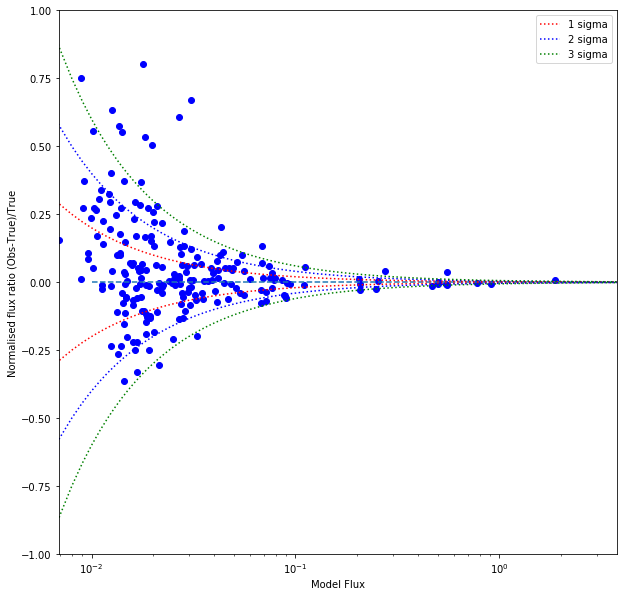

In [57]:
#fig = plt.figure(figsize=(8,8))
#theplot = fig.add_subplot(111,xlabel='S/N',ylabel='(Obs-True)/True', autoscalex_on=True,autoscaley_on=True)
#
#image_rms = 0.002
#
#theplot.plot(fR,fD,'bo')
#theplot.plot([0.01,1000],[0,0],ls='--')
#theplot.set_xscale('log')
##theplot.set_yscale('log')

#theplot.set_xlim([1,1000])
#theplot.set_ylim([0.0001,0.04])
##theplot.set_ylim([-0.5,0.5])


#xx = np.arange(0.03,10.0,0.01)
#yy = (xx-0.004-xx)/xx 
#theplot.plot(xx,yy,ls=':',color='r')

#yy = (xx+0.004-xx)/xx
#theplot.plot(xx,yy,ls=':',color='r')

#yy = (xx-2*0.004-xx)/xx 
#theplot.plot(xx,yy,ls=':',color='b')

#yy = (xx+2*0.004-xx)/xx
#theplot.plot(xx,yy,ls=':',color='b')

image_rms = 0.002

fig = plt.figure(figsize=(10,10))
theplot = fig.add_subplot(111,xlabel='Model Flux',ylabel='Normalised flux ratio (Obs-True)/True', autoscalex_on=True,autoscaley_on=True)

theplot.plot(fR,fD,'bo')
theplot.plot([0.01,1000],[0,0],ls='--')
theplot.set_xscale('log')

theplot.set_xlim([np.min(fR),2.0*np.max(fR)])
theplot.set_ylim(-1.0,1.0)

xx = np.arange(0.001,10.0,0.001)
# 1 sigma lines
yy = (-image_rms)/xx 
theplot.plot(xx,yy,ls=':',color='r', label='1 sigma')
yy = (image_rms)/xx
theplot.plot(xx,yy,ls=':',color='r')
# 2 sigma lines
yy = (-2*image_rms)/xx 
theplot.plot(xx,yy,ls=':',color='b', label='2 sigma')
yy = (2*image_rms)/xx
theplot.plot(xx,yy,ls=':',color='b')
# 3 sigma lines
yy = (-3*image_rms)/xx
theplot.plot(xx,yy,ls=':',color='g', label='3 sigma')
yy = (3*image_rms)/xx
theplot.plot(xx,yy,ls=':',color='g')
theplot.legend()


In [54]:
#fig.savefig('fluxCompSelfNoNoise.eps')
fig.savefig('model2_stack_pybdsf_vs_model')

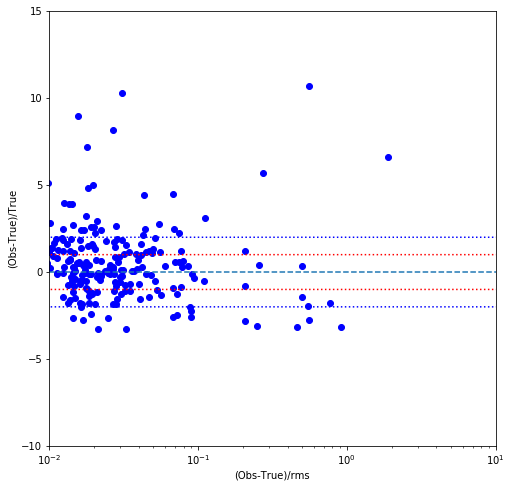

In [58]:
fig = plt.figure(figsize=(8,8))
theplot = fig.add_subplot(111,xlabel='(Obs-True)/rms',ylabel='(Obs-True)/True', autoscalex_on=True,autoscaley_on=True)

theplot.plot(fR,fV,'bo')
theplot.plot([0.01,1000],[0,0],ls='--')
theplot.set_xscale('log')
#theplot.set_yscale('log')

theplot.set_xlim([0.01,10])
#theplot.set_ylim([0.0001,0.04])
theplot.set_ylim([-10,15])


xx = np.arange(-0.001,10.0,0.001)
yy = (xx-image_rms-xx)/image_rms
theplot.plot(xx/image_rms,yy,ls=':',color='r')

yy = (xx+image_rms-xx)/image_rms
theplot.plot(xx/image_rms,yy,ls=':',color='r')

yy = (xx-2*image_rms-xx)/image_rms
theplot.plot(xx/image_rms,yy,ls=':',color='b')

yy = (xx+2*image_rms-xx)/image_rms
theplot.plot(xx/image_rms,yy,ls=':',color='b')


0.2809046628950004
50
148.05609389549656
72.18716212395529
0.5749021611766


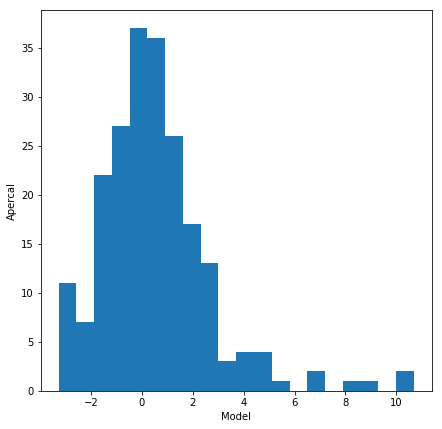

In [59]:
fig2 = plt.figure(figsize=(7,7))
theplot2 = fig2.add_subplot(111,xlabel='Model',ylabel='Apercal', autoscalex_on=True,autoscaley_on=True)

theplot2.hist(fV,bins=20)
#theplot.plot([0.0001,1],[0.0001,1],ls='--')
print np.median(fV)
ind = np.argmax(fV)
print ind
print pybdsf['RA'][ind]
print pybdsf['DEC'][ind]
print fluxT[ind]
#theplot.set_xlim([0.0001,0.04])
#theplot.set_ylim([0.0001,0.04])
#theplot.set_ylim([-200,200])